In [41]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
from sklearn.metrics import r2_score
import pickle
from bayesian_logistic_regression import BayesianLogisticRegression

In [42]:
features = ['Rect1Height', 'Rect1Width', 'Rect2Height', 'Rect2Width', 'Rect3Height', 'Rect3Width']
train_data = pd.read_csv('data/E2.csv')
e1a = pd.read_csv('data/E1a.csv')
e1b = pd.read_csv('data/E1b.csv')
e1c = pd.read_csv('data/E1c.csv')

## Train a model

In [43]:
X_train = train_data[features].values
y_train = train_data.response.values - 1
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
# model = RandomForestClassifier(n_estimators=100)
# model = tree.DecisionTreeClassifier(max_depth=5)
# model = SVC(probability=True, gamma='auto')
# model = BayesianLogisticRegression(10000)
model.fit(X_train, y_train)
# model.save('bayes_logistic.pkl')
# model.load('bayes_logistic.pkl')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

## Results

In [44]:
def predict(model, data):
    def get_freq(x):
        hist, _ = np.histogram(x, 3)
        return hist/hist.sum()
    
    X_test = data[features].values
    y_test = data.response.values
    actual_freq = get_freq(y_test)
    pred_freq = model.predict_proba(X_test).mean(0) # get_freq(pred)
    return actual_freq, pred_freq, ((actual_freq - pred_freq) ** 2).mean()

In [45]:
def get_predictions(model, data):
    MSE = []
    actual = []
    pred = []
    for d in data:
        actual_freq, pred_freq, mse = predict(model, d)
        MSE.append(mse)
        actual.append(actual_freq)
        pred.append(pred_freq)
#         print(actual_freq, pred_freq, mse)

    actual = np.array(actual)
    pred = np.array(pred)
    return actual, pred, MSE

In [46]:
markers = ['^', 'o', 's', 'd', '.', '*', 'x', 'p', 'h', 'v']
colors = ['r', 'lime', 'b']
def plot_results(actual, pred):
    for i in range(3):
        x, y = actual[:, i], pred[:, i]
        for j in range(len(x)):
            plt.scatter(x[j], y[j], marker=markers[i], c=colors[1])
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.plot([0, 1], [0, 1])
    plt.xlim(0, 1)
    plt.ylim(0, 1)

### Train Results

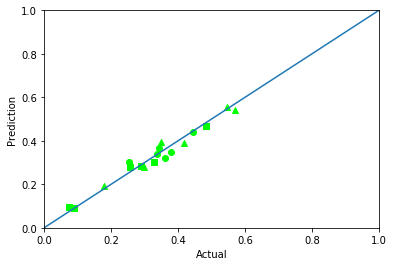

In [47]:
train_effects = [d for _, d in train_data.groupby('Effect')]
actual, pred, mse = get_predictions(model, train_effects)
plot_results(actual, pred)

### Test results

#### Attraction

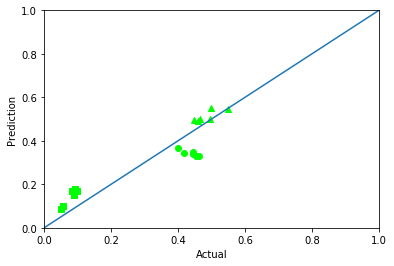

In [48]:
e1a_effects = [d for _, d in e1a.groupby('Effect')]
actual, pred, mse = get_predictions(model, [*e1a_effects])
plot_results(actual, pred)

#### Compromise

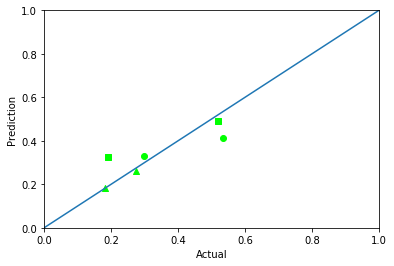

In [49]:
e1b_effects = [d for _, d in e1b.groupby('Effect')]
actual, pred, mse = get_predictions(model, [*e1b_effects])
plot_results(actual, pred)

#### Similarity

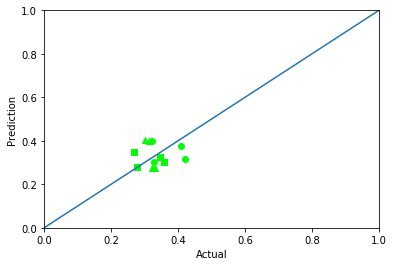

In [50]:
e1c_effects = [d for _, d in e1c.groupby('Effect')]
actual, pred, mse = get_predictions(model, [*e1c_effects])
plot_results(actual, pred)